In [1]:
import math
import numpy as np
import sklearn as skl
import tensorflow as tf
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as plt3d
from scipy import stats

* 贝叶斯公式 &rarr; 类别后验概率 &rArr; 在样本特征$X$的观测值$x$时 判断样本属于类别$\omega_{i}$的概率
$$
p(\omega_{i} | x) = \frac{p(x | \omega_{i}) p(\omega_{i})}{p(x)}
$$
* 先验知识 || 样本估计 &rarr; 类别条件概率密度 &rArr; 在类别$\omega_{i}$下样本特征$X$的概率密度
$$
p(x | \omega_{i})
$$
* 先验知识 || 样本估计 &rarr; 类别先验概率 &rArr; 类别$\omega_{i}$占样本空间的比例
$$
p(\omega_{i})
$$
* 全概率公式 &rarr; 证据因子 &rArr; 样本特征$X$的概率密度
$$
p(x) = \sum_{i = 1}^{c}p(x | \omega_{i}) p(\omega_{i})
$$

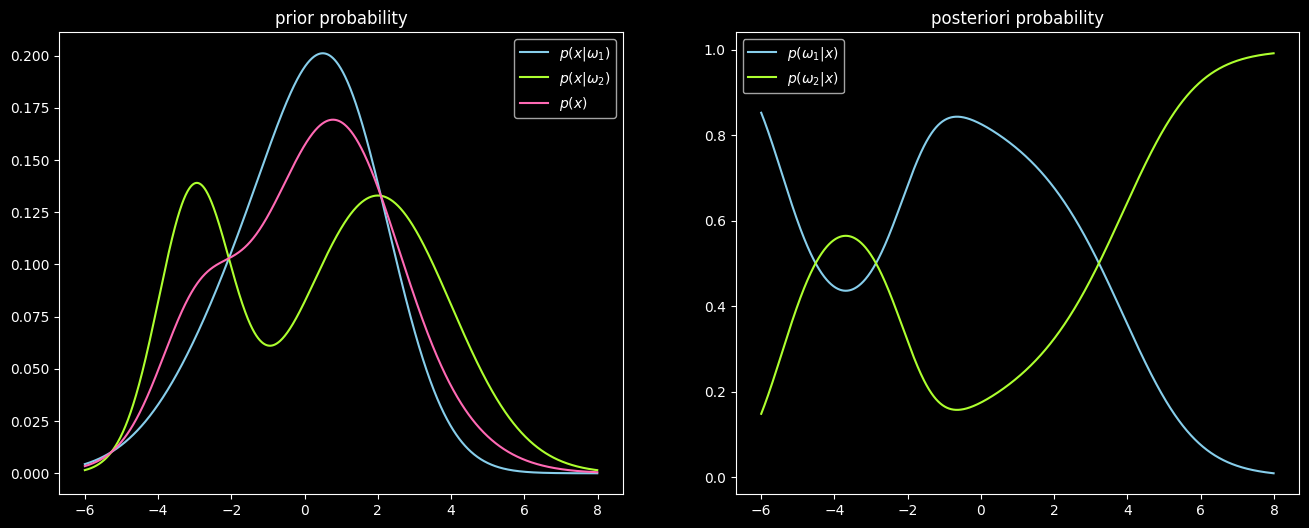

In [26]:
X = np.arange(-6.0, 8.0, 0.01)

P_X_Omega1 = stats.norm(loc=-1.0, scale=2.0).pdf(X) * (1/2) + stats.norm(loc=1.0, scale=1.5).pdf(X) * (1/2)
P_X_Omega2 = stats.norm(loc=-3.0, scale=1.0).pdf(X) * (1/3) + stats.norm(loc=2.0, scale=2.0).pdf(X) * (2/3)
# 类别条件概率
P_X        = P_X_Omega1 * (2/3) + P_X_Omega2 * (1/3)
# 证据因子
P_Omega1_X = P_X_Omega1 * (2/3) / P_X
P_Omega2_X = P_X_Omega2 * (1/3) / P_X
# 类别后验概率

plt.style.use('dark_background')
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

axs[0].set_title("prior probability")
axs[0].plot(X, P_X_Omega1, color='skyblue',     label=r'$p(x | \omega_{1})$')
axs[0].plot(X, P_X_Omega2, color='greenyellow', label=r'$p(x | \omega_{2})$')
axs[0].plot(X, P_X,        color='hotpink',     label=r'$p(x)$')

axs[1].set_title("posteriori probability")
axs[1].plot(X, P_Omega1_X, color='skyblue',     label=r'$p(\omega_{1} | x)$')
axs[1].plot(X, P_Omega2_X, color='greenyellow', label=r'$p(\omega_{2} | x)$')

axs[0].legend()
axs[1].legend()

plt.show()

* 条件误分类概率 &rArr; 在样本特征$X$的观测值为$x$时 将样本判断为类别$\omega_{i}$出错的概率
$$
p(error | x) = 1 - p(\omega_{i} | x)
$$
* 误分类概率 &rArr; 条件误分类概率$p(error | x)$的期望
$$
p(error) = \int_{-\infty}^{\infty} p(error | x) p(x)dx
$$
* 贝叶斯决策规则 &rArr; 使分类产生的误分类概率$p(error)$最小的决策方法
$$
\hat{\omega} = arg \min_{\omega}p(error) = arg \min_{\omega}p(error | x) = arg \max_{\omega}p(\omega_{i} | x)
$$
* 也就是将后验概率最大的类别作为预测值，由此可知，贝叶斯分类器是理论的最优分类器
<br /><br />
<center> 推广到一般形式 </center>
<center> <font size=8>&dArr; </font></center>

* $c$个类别集
$$
\omega_{1}, \omega_{2}, \dots, \omega_{c}
$$
* $a$个行为集
$$
\alpha_{1}, \alpha_{2}, \dots, \alpha_{a}
$$
* 真实类别为$\omega_{j}$时采取行动$\alpha_{i}$的风险函数
$$
\lambda(\alpha_{i} | \omega_{j})
$$
* 将风险函数扩展为风险矩阵
$$
\mathbf{\Lambda} = 
\begin{pmatrix}
\lambda(\alpha_{1} | \omega_{1})    &   \lambda(\alpha_{1} | \omega_{2})    &   \cdots  &   \lambda(\alpha_{1} | \omega_{c})    \\
\lambda(\alpha_{2} | \omega_{1})    &   \lambda(\alpha_{2} | \omega_{2})    &   \cdots  &   \lambda(\alpha_{2} | \omega_{c})    \\
\vdots                              &   \vdots                              &   \ddots  &   \vdots                              \\
\lambda(\alpha_{a} | \omega_{1})    &   \lambda(\alpha_{a} | \omega_{2})    &   \cdots  &   \lambda(\alpha_{a} | \omega_{c})    \\
\end{pmatrix}
$$
* $d$维特征向量
$$
\mathbf{X} = 
\begin{pmatrix}
x_{1}  \\
x_{2}  \\
\vdots \\
x_{d}  \\
\end{pmatrix}
$$
* 条件联合概率密度
$$
p(\mathbf{x} | \omega_{i}) = p(x_{1}, x_{2}, \dots, x_{d} | \omega_{i})
$$
* 条件风险 &rArr; 在样本特征$\mathbf{X}$的观测值为$\mathbf{x}$时 采取行为$\alpha_{i}$的风险
$$
R(\alpha_{i} | \mathbf{x}) = \sum_{j = 1}^{c} \lambda(\alpha_{i} | \omega_{j}) p(\omega_{j} | \mathbf{x})
$$
* 将条件风险扩展为条件风险向量
$$
\mathbf{R} = 
\begin{pmatrix}
R(\alpha_{1} | \mathbf{x}) \\
R(\alpha_{2} | \mathbf{x}) \\
\vdots                     \\
R(\alpha_{a} | \mathbf{x}) \\
\end{pmatrix}
=
\mathbf{\Lambda}
\begin{pmatrix}
p(\omega_{1} | \mathbf{x}) \\
p(\omega_{2} | \mathbf{x}) \\
\vdots                     \\
p(\omega_{c} | \mathbf{x}) \\
\end{pmatrix}
$$
* 行为函数 &rArr; 对样本特征$X$进行观测之后采取的行为
$$
\mathbf{\alpha}(\mathbf{x}),\quad \mathbf{\alpha} : \mathbb{R}^{d} \to \left \{ \alpha_{1}, \alpha_{2}, \dots, \alpha_{a} \right \}
$$
* 总风险 &rArr; 在行为函数$\mathbf{\alpha}(\mathbf{x})$下的条件风险$R(\mathbf{\alpha}(\mathbf{x}) | \mathbf{x})$的期望
$$
\mathfrak{R} = \int_{\mathbb{R}^{d}} R(\mathbf{\alpha}(\mathbf{x}) | \mathbf{x}) p(\mathbf{x}) d\mathbf{x}
$$
* 贝叶斯决策规则 &rArr; 使行为产生的总风险$\mathfrak{R}$最小的决策方法
$$
\mathbf{\alpha}(\mathbf{x}) = arg \min_{\alpha_{i}} \mathfrak{R}
                            = arg \min_{\alpha_{i}} R(\alpha_{i} | \mathbf{x})
                            = arg \min_{\alpha_{i}} \sum_{j = 1}^{c} \lambda(\alpha_{i} | \omega_{j}) p(\omega_{j} | \mathbf{x})
$$

* 最小误差率分类
<br /><br /><br />
    * 定义行为
    $$
    \alpha_{i}: 将样本判定为类别 \omega_{i}
    $$
    * 定义风险函数 &rArr; 判定正确为0，反之为1
    $$
    \lambda(\alpha_{i} | \omega_{j}) = 
        \left\{
        \begin{matrix}
        0,\quad i = j \\ \\
        1, \quad i \ne j
        \end{matrix}
        \right.
    $$ 
    * 条件风险
    $$
    R(\alpha_{i} | \mathbf{x}) = \sum_{j = 1}^{c} \lambda(\alpha_{i} | \omega_{j}) p(\omega_{j} | \mathbf{x})
                               = \sum_{i \ne j} p(\omega_{j} | \mathbf{x})
                               = 1 - p(\omega_{i} | \mathbf{x})
    $$
    * 贝叶斯决策规则 &rarr; 最优行为函数 &rArr; 将样本判定为类别后验概率最大的类别
    $$
    \mathbf{\alpha}(\mathbf{x}) = arg \min_{\alpha_{i}} R(\alpha_{i} | \mathbf{x})
                                = arg \max_{\alpha_{i}} p(\omega_{i} | \mathbf{x})
    $$
    * 对以上模型进行一定的改进 &rArr; 调整不同类别之间的判错风险
    $$
    \lambda(\alpha_{i} | \omega_{j}) = 
        \left\{
        \begin{matrix}
        0,\quad i = j \\ \\
        \lambda_{ij}, \quad i \ne j
        \end{matrix}
        \right.
    $$
    * 模型会将被判错风险较大的类别的判定域增大

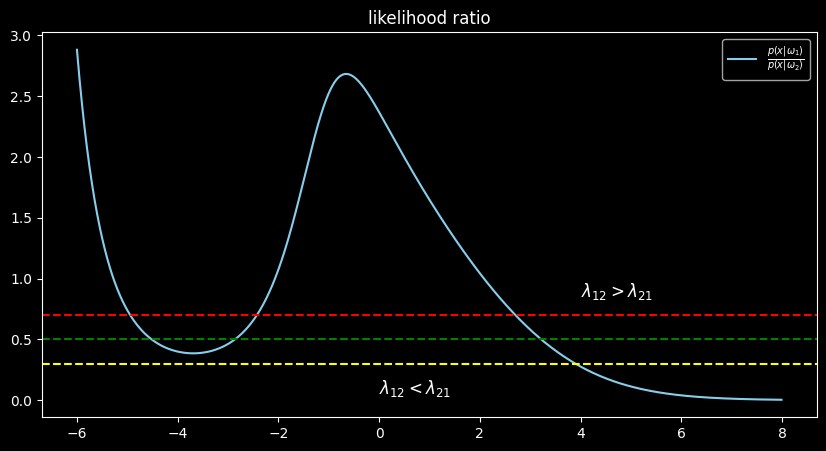

In [27]:
Likelihood_Ratio = P_X_Omega1 / P_X_Omega2
# 似然比
plt.style.use('dark_background')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

ax.set_title("likelihood ratio")
ax.plot(X, Likelihood_Ratio, color='skyblue', label=r'$\frac{p(x | \omega_{1})}{p(x | \omega_{2})}$')

ax.axhline(0.5, color='green',  linestyle='--')  # 1 => 2的风险等于2 => 1的风险
ax.axhline(0.7, color='red',    linestyle='--')  # 1 => 2的风险小于2 => 1的风险
ax.axhline(0.3, color='yellow', linestyle='--')  # 1 => 2的风险大于2 => 1的风险

ax.text(x=4, y=0.85, s=r'$\lambda_{12} > \lambda_{21}$', fontdict=dict(fontsize=12))
ax.text(x=0, y=0.05, s=r'$\lambda_{12} < \lambda_{21}$', fontdict=dict(fontsize=12))

ax.legend()

plt.show()

* 极小化极大准则
<br /><br />
    * 在二分类中确定了行为$\alpha_{1}$和$\alpha_{2}$的区域$\mathcal{R}_{1}$和$\mathcal{R}_{2}$后总风险可以表示为
    $$
    \begin{align*}
    \mathfrak{R} &= \int_{\mathcal{R}_{1}} R(\alpha_{1} | \mathbf{x}) p(\mathbf{x}) d\mathbf{x} + 
                    \int_{\mathcal{R}_{2}} R(\alpha_{2} | \mathbf{x}) p(\mathbf{x}) d\mathbf{x} \\ \\
                 &= \int_{\mathcal{R}_{1}} (\lambda_{11} p(\omega_{1} | \mathbf{x}) + \lambda_{12} p(\omega_{2} | \mathbf{x})) p(\mathbf{x}) d\mathbf{x} +
                    \int_{\mathcal{R}_{2}} (\lambda_{21} p(\omega_{1} | \mathbf{x}) + \lambda_{22} p(\omega_{2} | \mathbf{x})) p(\mathbf{x}) d\mathbf{x} \\ \\
                 &= \int_{\mathcal{R}_{1}} (\lambda_{11} p(\mathbf{x} | \omega_{1}) p(\omega_{1}) + \lambda_{12} p(\mathbf{x} | \omega_{2})p(\omega_{2}))
                     d\mathbf{x} +
                    \int_{\mathcal{R}_{2}} (\lambda_{21} p(\mathbf{x} | \omega_{1}) p(\omega_{1}) + \lambda_{22} p(\mathbf{x} | \omega_{2})p(\omega_{2}))
                     d\mathbf{x} \\ \\
                 &= p(\omega_{1}) (\lambda_{11} \int_{\mathcal{R}_{1}} p(\mathbf{x} | \omega_{1}) d\mathbf{x} + 
                                   \lambda_{21} \int_{\mathcal{R}_{2}} p(\mathbf{x} | \omega_{1}) d\mathbf{x}) +
                    p(\omega_{2}) (\lambda_{12} \int_{\mathcal{R}_{1}} p(\mathbf{x} | \omega_{2}) d\mathbf{x} + 
                                   \lambda_{22} \int_{\mathcal{R}_{2}} p(\mathbf{x} | \omega_{2}) d\mathbf{x}) \\
    \end{align*}
    $$
    * 通过关系
    $$
    p(\omega_{1}) + p(\omega_{2}) = 1,\quad \int_{\mathcal{R}_{1}} p(\mathbf{x} | \omega) d\mathbf{x} + 
                                            \int_{\mathcal{R}_{2}} p(\mathbf{x} | \omega) d\mathbf{x} = 1
    $$
    * 将总风险化为
    $$
    \begin{align*}
    \mathfrak{R}(p(\omega_{1})) &= \lambda_{22} + (\lambda_{12} - \lambda_{22}) \int_{\mathcal{R}_{1}} p(\mathbf{x} | \omega_{2}) d\mathbf{x} +
                                   p(\omega_{1}) \left [ (\lambda_{11} - \lambda_{21}) \int_{\mathcal{R}_{1}} p(\mathbf{x} | \omega_{1}) d\mathbf{x} -
                                                         (\lambda_{12} - \lambda_{22}) \int_{\mathcal{R}_{1}} p(\mathbf{x} | \omega_{2}) d\mathbf{x} +
                                                         (\lambda_{21} - \lambda_{22}) \right ] \\ \\
                                &= \mathfrak{R}_{mm} + \mu p(\omega_{1})
    \end{align*}
    $$
    * 其中
    $$
    \begin{gather*}
    \begin{align*}
    \mathfrak{R}_{mm} &= \lambda_{22} + (\lambda_{12} - \lambda_{22}) \int_{\mathcal{R}_{1}} p(\mathbf{x} | \omega_{2}) d\mathbf{x} \\ \\
                      &= \lambda_{11} + (\lambda_{21} - \lambda_{11}) \int_{\mathcal{R}_{2}} p(\mathbf{x} | \omega_{1}) d\mathbf{x}
    \end{align*}
    \\ \\
    \begin{align*}
    \mu &= (\lambda_{11} - \lambda_{21}) \int_{\mathcal{R}_{1}} p(\mathbf{x} | \omega_{1}) d\mathbf{x} -
           (\lambda_{12} - \lambda_{22}) \int_{\mathcal{R}_{1}} p(\mathbf{x} | \omega_{2}) d\mathbf{x} + (\lambda_{21} - \lambda_{22}) \\ \\
        &= (\lambda_{22} - \lambda_{12}) \int_{\mathcal{R}_{2}} p(\mathbf{x} | \omega_{2}) d\mathbf{x} -
           (\lambda_{21} - \lambda_{11}) \int_{\mathcal{R}_{2}} p(\mathbf{x} | \omega_{1}) d\mathbf{x} + (\lambda_{12} - \lambda_{11})
    \end{align*}
    \end{gather*}
    $$
    * 实际情况中类别条件概率密度$p(\mathbf{x} | \omega)$相对固定，但类别先验概率$p(\omega)$可能会出现较大的变化，选取合适的行为区域$\mathcal{R}$使得式中的系数$\mu = 0$时
    $$
   \mathfrak{R} = \mathfrak{R}_{mm}
    $$
    * 即总风险与先验概率无关，避免遇到极端情况时产生很大的风险

In [44]:
def total_error(p_omega_1, delta_x):  # 计算总风险
    p_1 = 0.0
    p_2 = 0.0
    # R_1上p(x | omega_1)积分以及R_1上p(x | omega_2)积分
    p_omega_2 = 1 - p_omega_1
    # omega_2的类别先验概率
    for p_x_omega1_k, p_x_omega2_k in zip(P_X_Omega1, P_X_Omega2):
        if p_x_omega1_k * p_omega_1 > p_x_omega2_k * p_omega_2:
            # 区域R_1内
            p_1 += p_x_omega1_k * delta_x
            p_2 += p_x_omega2_k * delta_x
    # 计算类别条件概率密度的积分
    return p_2 + p_omega_1 * (1 - p_1 - p_2)

P_Omega_1   = np.arange(0, 1.01, 0.01)
Total_Error = [total_error(p_omega_1, 0.01) for p_omega_1 in P_Omega_1]
Tangent     = ((Total_Error[71] - Total_Error[70]) / 0.01) * (P_Omega_1 - P_Omega_1[70]) + Total_Error[70]

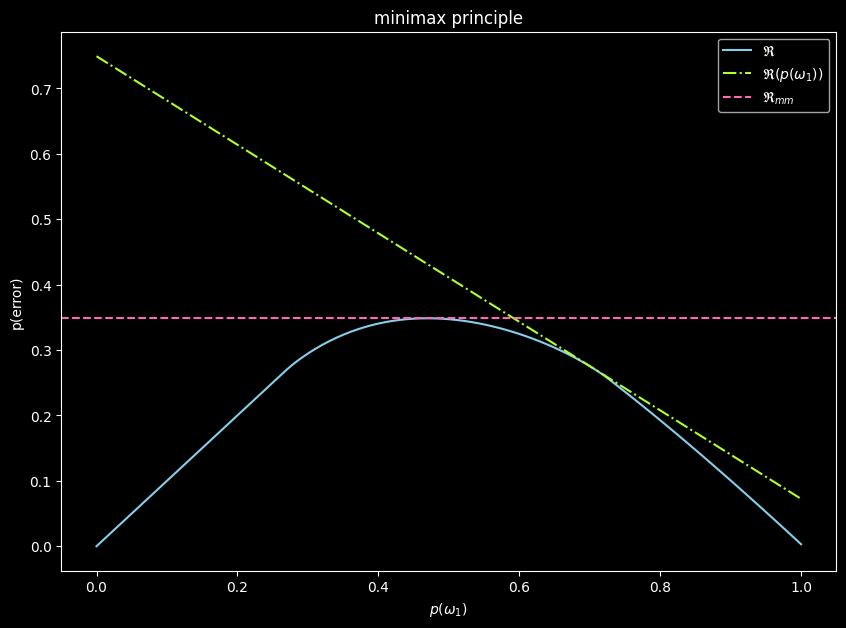

In [47]:
plt.style.use('dark_background')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

ax.set_title('minimax principle')
ax.set_ylabel('p(error)')
ax.set_xlabel(r'$p(\omega_{1})$')
ax.plot(P_Omega_1, Total_Error, color='skyblue',  label=r'$\mathfrak{R}$')
ax.plot(P_Omega_1, Tangent,     color='greenyellow', linestyle='-.', label=r'$\mathfrak{R}(p(\omega_{1}))$')
ax.axhline(max(Total_Error), color='hotpink', linestyle='--', label=r'$\mathfrak{R}_{mm}$')

ax.legend()
plt.show()

* 一般的分类器可以通过判别函数来表述
$$
\begin{gather*}
g_{i}(\mathbf{x}),\quad g_{i} : \mathbb{R}^{d} \to \mathbb{R},\quad i = 1,\ 2,\ \dots,\ c \\ \\
\hat{\omega} = arg \max_{\omega_{i}} g_{i}(\mathbf{x})
\end{gather*}
$$
* 同时，判别函数也可以是
$$
f(g_{i}(\mathbf{x})),\quad f(\cdot)单调递增
$$
* 则贝叶斯分类器可以表述为
$$
\begin{gather*}
g_{i}(\mathbf{x}) = -R(\alpha_{i} | \mathbf{x}) \\ \\
g_{i}(\mathbf{x}) = p(\omega_{i} | \mathbf{x}) = \frac{p(x | \omega_{i}) p(\omega_{i})}{p(x)} \\ \\
g_{i}(\mathbf{x}) = p(x | \omega_{i}) p(\omega_{i}) \\ \\
g_{i}(\mathbf{x}) = \ln{p(x | \omega_{i})} + \ln{p(\omega_{i})}
\end{gather*}
$$
* 对于二分类而言，可以采用单个判别函数
$$
\begin{gather*}
g(\mathbf{x}) = g_{1}(\mathbf{x}) - g_{2}(\mathbf{x}) \\ \\
\hat{\omega} = 
        \left\{
        \begin{matrix}
        \omega_{1},\quad g(\mathbf{x}) >   0 \\ \\
        \omega_{2},\quad g(\mathbf{x}) \le 0
        \end{matrix}
        \right.
\end{gather*}
$$
* 假设在每一类中样本特征$\mathbf{X} \sim N(\mathbf{\mu},\ \mathbf{\Sigma})$，即
$$
p(\mathbf{x}) = \frac{1}{(2\pi)^{\frac{d}{2}} \left| \mathbf{\Sigma} \right|^{\frac{1}{2}} }
                exp \left[ -\frac{1}{2} (\mathbf{x} - \mathbf{\mu})^T \mathbf{\Sigma}^{-1} (\mathbf{x} - \mathbf{\mu}) \right]
$$
* 取判别函数为
$$
\begin{align*}
g_{i}(\mathbf{x}) &= \ln{p(x | \omega_{i})} + \ln{p(\omega_{i})} \\ \\
                  &= -\frac{1}{2} (\mathbf{x} - \mathbf{\mu}_{i})^T \mathbf{\Sigma}_{i}^{-1} (\mathbf{x} - \mathbf{\mu}_{i}) -
                     \frac{d}{2} \ln{2\pi} - \frac{1}{2} \ln \left| \mathbf{\Sigma}_{i} \right| + \ln{p(\omega_{i})} \\ \\
                  &\Rightarrow -\frac{1}{2} (\mathbf{x} - \mathbf{\mu}_{i})^T \mathbf{\Sigma}_{i}^{-1} (\mathbf{x} - \mathbf{\mu}_{i}) -
                                \frac{1}{2} \ln \left| \mathbf{\Sigma}_{i} \right| + \ln{p(\omega_{i})} \\ \\
\end{align*}
$$
* 考虑以下三种情况
<br /><br />
    * $\mathbf{\Sigma}_{i} = \mathbf{\Sigma} = \sigma^{2} \mathbf{I}$
    $$
    \begin{align*}
    g_{i}(\mathbf{x}) &= -\frac{1}{2\sigma^{2}} (\mathbf{x} - \mathbf{\mu}_{i})^T (\mathbf{x} - \mathbf{\mu}_{i}) -
                          \frac{1}{2} \ln \left| \mathbf{\Sigma} \right| + \ln{p(\omega_{i})} \\ \\
                      &\Rightarrow -\frac{1}{2\sigma^{2}} (\mathbf{x} - \mathbf{\mu}_{i}) \cdot (\mathbf{x} - \mathbf{\mu}_{i}) + \ln{p(\omega_{i})} \\ \\
                      &= -\frac{1}{2\sigma^{2}} (\mathbf{x} \cdot \mathbf{x} - 2\mu_{i} \cdot \mathbf{x} + \mu_{i} \cdot \mu_{i}) + \ln{p(\omega_{i})} \\ \\
                      &\Rightarrow -\frac{1}{2\sigma^{2}} (-2\mu_{i} \cdot \mathbf{x} + \mu_{i} \cdot \mu_{i}) + \ln{p(\omega_{i})} \\ \\
                      &= \frac{1}{\sigma^2} \mu_{i} \cdot \mathbf{x} - \frac{1}{2\sigma^2} \mu_{i} \cdot \mu_{i} + \ln{p(\omega_{i})}
                      = \mathbf{w}_{i} \cdot \mathbf{x} + b_{i}
    \end{align*}
    $$
    * $\mathbf{\Sigma}_{i} = \mathbf{\Sigma} = any$
    $$
    \begin{align*}
    g_{i}(\mathbf{x}) &= -\frac{1}{2} (\mathbf{x} - \mathbf{\mu}_{i})^T \mathbf{\Sigma}^{-1} (\mathbf{x} - \mathbf{\mu}_{i}) -
                          \frac{1}{2} \ln \left| \mathbf{\Sigma} \right| + \ln{p(\omega_{i})} \\ \\
                      &\Rightarrow -\frac{1}{2} (\mathbf{x} - \mathbf{\mu}_{i})^T \mathbf{\Sigma}^{-1} (\mathbf{x} - \mathbf{\mu}_{i}) + \ln{p(\omega_{i})}
    \end{align*}
    $$
    * $\mathbf{\Sigma}_{i} = any$
    $$
    g_{i}(\mathbf{x}) = -\frac{1}{2} (\mathbf{x} - \mathbf{\mu}_{i})^T \mathbf{\Sigma}_{i}^{-1} (\mathbf{x} - \mathbf{\mu}_{i}) -
                         \frac{1}{2} \ln \left| \mathbf{\Sigma}_{i} \right| + \ln{p(\omega_{i})}
    $$
* 第一种情况中分类器